In [32]:
import geopandas as gpd

# Charger le shapefile
gdf = gpd.read_file(r"D:\UQTR\Automne 2024\Ouest\geo1113_2024_data\geo1113_2024_data\Moraines\Moraines_all.shp")

# Vérifier le système de coordonnées
print("Système de coordonnées initial :", gdf.crs)

# Reprojeter si nécessaire
gdf = gdf.to_crs(epsg=32633)  # Modifiez l'EPSG en fonction de votre zone
print("Système de coordonnées après reprojection :", gdf.crs)

# Trier par année
gdf = gdf.sort_values(by='year')

# Extraire les points
points = gdf.geometry.tolist()

# Calculer les distances entre les points consécutifs
distances = []

for i in range(len(points) - 1):
    distance = points[i].distance(points[i + 1])
    distances.append(distance)
    annee1 = gdf.iloc[i]['year']
    annee2 = gdf.iloc[i + 1]['year']
    print(f"Distance entre {annee1} et {annee2} : {distance:.2f} mètres")

# Distance totale
distance_totale = sum(distances)
print(f"Distance totale parcourue par la moraine : {distance_totale:.2f} mètres")


Système de coordonnées initial : EPSG:4326
Système de coordonnées après reprojection : EPSG:32633
Distance entre 1843 et 1935 : 696.52 mètres
Distance entre 1935 et 1942 : 119.37 mètres
Distance entre 1942 et 1948 : 89.65 mètres
Distance entre 1948 et 1992 : 679.07 mètres
Distance totale parcourue par la moraine : 1584.61 mètres


Système de coordonnées initial : EPSG:4326
Système de coordonnées après reprojection : EPSG:32633
Années disponibles dans le fichier :
[1935 1942 1948 1992 2004 2010 2016 2022]
Années réelles : 1935 à 1942 -> Retrait: 17.06 m/an
Années réelles : 1942 à 1948 -> Retrait: 14.94 m/an
Années réelles : 1948 à 1992 -> Retrait: 15.43 m/an
Années réelles : 1992 à 2004 -> Retrait: 11.88 m/an
Années réelles : 2004 à 2010 -> Retrait: 15.28 m/an
Années réelles : 2010 à 2016 -> Retrait: 32.61 m/an
Années réelles : 2016 à 2022 -> Retrait: 30.99 m/an


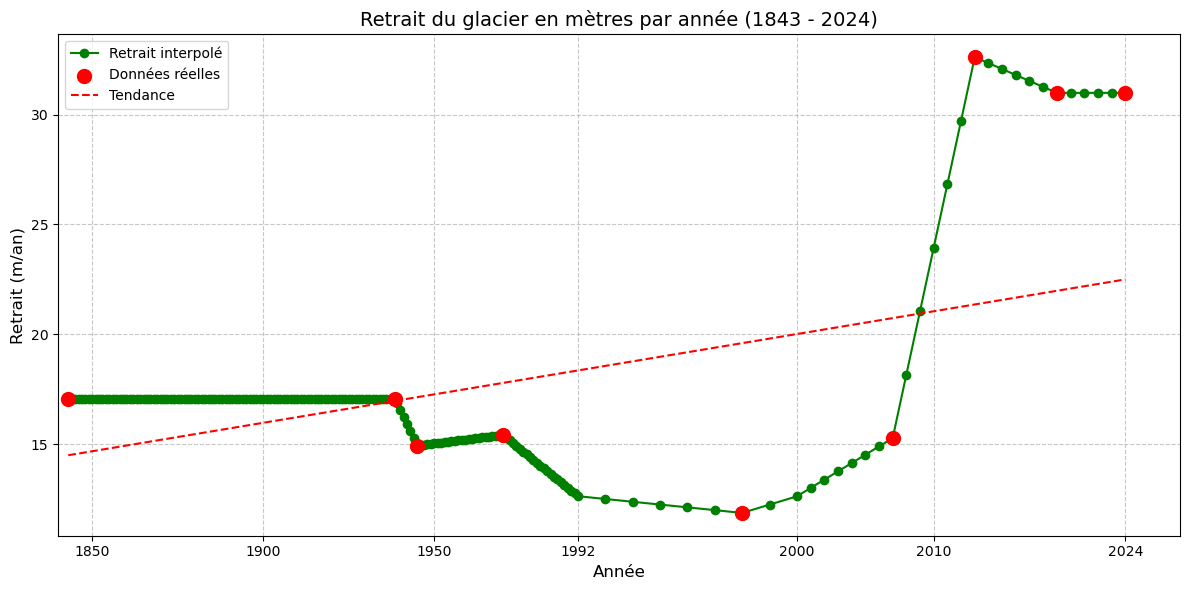

Système de coordonnées initial : EPSG:32611
Système de coordonnées après reprojection : EPSG:32633
Années disponibles dans le fichier :
[2002 2024 2009 2015 1948 1942 1935 1843 1992 2020 2006 2022 2017]
Années réelles : 1843 à 1935 -> Retrait: 7.57 m/an
Années réelles : 1935 à 1942 -> Retrait: 17.05 m/an
Années réelles : 1942 à 1948 -> Retrait: 14.98 m/an
Années réelles : 1948 à 1992 -> Retrait: 15.43 m/an
Années réelles : 1992 à 2002 -> Retrait: 12.08 m/an
Années réelles : 2002 à 2006 -> Retrait: 18.67 m/an
Années réelles : 2006 à 2009 -> Retrait: 18.86 m/an
Années réelles : 2009 à 2015 -> Retrait: 23.02 m/an
Années réelles : 2015 à 2017 -> Retrait: 35.65 m/an
Années réelles : 2017 à 2020 -> Retrait: 20.61 m/an
Années réelles : 2020 à 2022 -> Retrait: 24.55 m/an
Années réelles : 2022 à 2024 -> Retrait: 27.32 m/an
Système de coordonnées initial : EPSG:4326
Système de coordonnées après reprojection : EPSG:32633
Années disponibles dans le fichier :
[1935 1942 1948 1992 2004 2010 2016 202

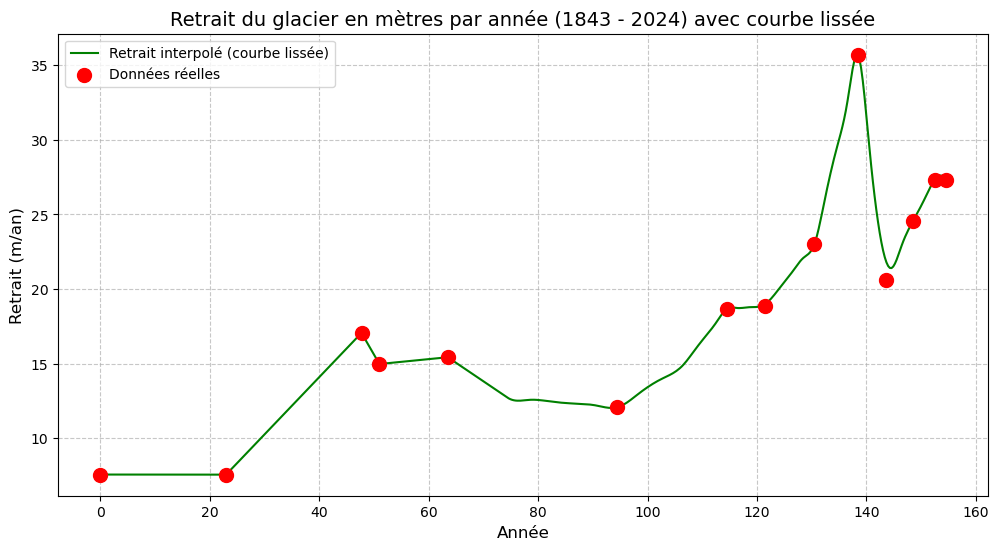

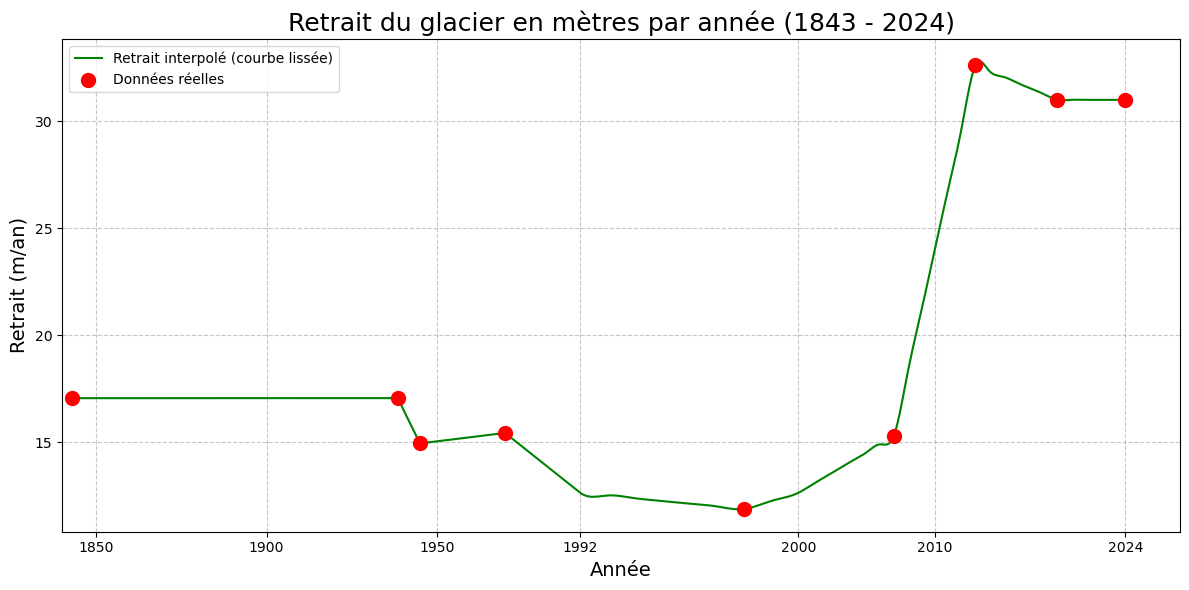

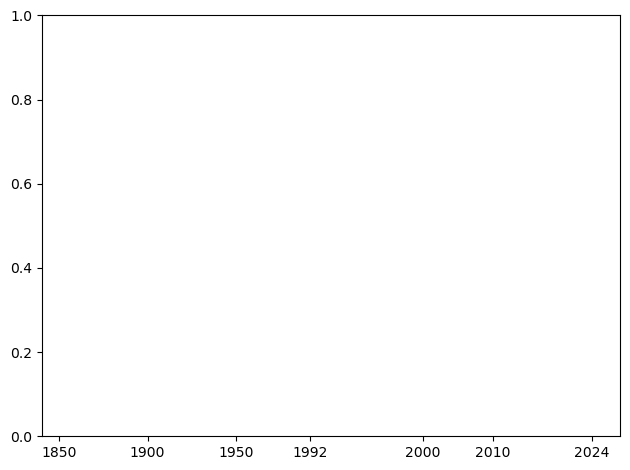

In [39]:
plt.figure(figsize=(12, 6))

# Tracer la courbe lissée
plt.plot(x_smooth, retreats_smooth, linestyle='-', color='green', label='Retrait interpolé (courbe lissée)')

# Tracer la ligne de tendance
plt.plot(years_full_transformed, p(years_full_transformed), "r--", label='Tendance')

# Ajouter les labels et le titre
plt.title('Retrait du glacier en mètres par année (1843 - 2024)', fontsize=18)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Retrait (m/an)', fontsize=14)

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.7)

# Ajouter une légende
plt.legend()

# Personnaliser les ticks et labels sur l'axe des x

# Choisir les années spécifiques à afficher
years_to_label = [1850, 1900, 1950, 1992, 2000, 2010, 2024]

# Transformer ces années avec la fonction custom_transform
ticks = custom_transform(np.array(years_to_label))

# Ajouter les labels pour les années sélectionnées
plt.xticks(ticks, years_to_label)

# Ajuster les limites de l'axe des x pour inclure 2024 avec la transformation
plt.xlim(custom_transform(1840), custom_transform(2028))

# Afficher le graphique
plt.tight_layout()
plt.show()


Système de coordonnées initial : EPSG:4326
Système de coordonnées après reprojection : EPSG:32633
Années disponibles dans le fichier :
[1935 1942 1948 1992 2004 2010 2016 2022]
Années réelles : 1935 à 1942 -> Retrait: 17.06 m/an
Années réelles : 1942 à 1948 -> Retrait: 14.94 m/an
Années réelles : 1948 à 1992 -> Retrait: 15.43 m/an
Années réelles : 1992 à 2004 -> Retrait: 11.88 m/an
Années réelles : 2004 à 2010 -> Retrait: 15.28 m/an
Années réelles : 2010 à 2016 -> Retrait: 32.61 m/an
Années réelles : 2016 à 2022 -> Retrait: 30.99 m/an


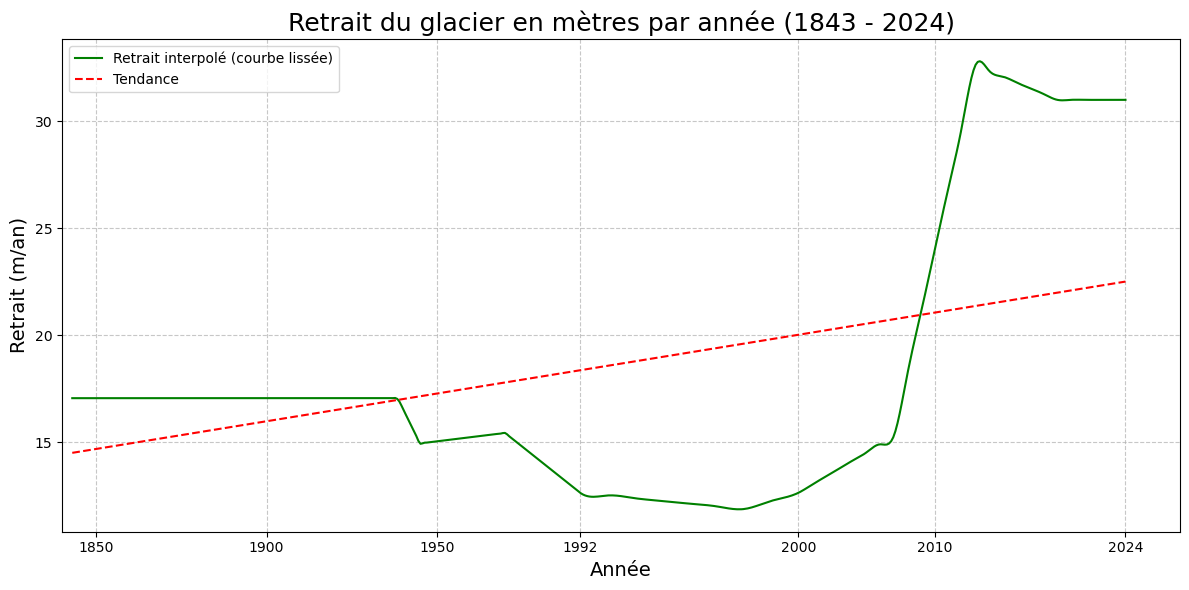

In [40]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

# 1. Charger le Shapefile original contenant les points
gdf = gpd.read_file(r"D:\UQTR\Automne 2024\Ouest\points_all.shp")

# 2. Vérifier le système de coordonnées
print("Système de coordonnées initial :", gdf.crs)

# 3. Reprojeter si nécessaire pour travailler dans un système métrique (par exemple UTM zone 33N)
gdf = gdf.to_crs(epsg=32633)
print("Système de coordonnées après reprojection :", gdf.crs)

# 4. Convertir la colonne 'year' en type numérique
gdf['year'] = pd.to_numeric(gdf['year'], errors='coerce')

# 5. Supprimer les lignes avec des valeurs manquantes ou années hors plage
gdf = gdf.dropna(subset=['year'])
gdf = gdf[(gdf['year'] >= 1843) & (gdf['year'] <= 2024)]

# 6. Trier par année
gdf = gdf.sort_values(by='year').reset_index(drop=True)

# 7. Extraire les années et géométries existantes
years_existing = gdf['year'].values
points_existing = gdf.geometry.values

# 8. Créer une plage complète d'années de 1843 à 2024
years_full = np.arange(1843, 2025)

# 9. Interpoler les coordonnées manquantes pour les années sans points
# Interpoler séparément les coordonnées x et y des points existants
x_existing = np.array([point.x for point in points_existing])
y_existing = np.array([point.y for point in points_existing])

# Interpolation linéaire pour les coordonnées x et y
x_interpolated = np.interp(years_full, years_existing, x_existing)
y_interpolated = np.interp(years_full, years_existing, y_existing)

# 10. Créer les nouveaux points à partir des coordonnées interpolées
points_full = [Point(x, y) for x, y in zip(x_interpolated, y_interpolated)]

# 11. Créer un nouveau GeoDataFrame avec toutes les années et les points interpolés
gdf_full = gpd.GeoDataFrame({'year': years_full, 'geometry': points_full}, crs=gdf.crs)

# 12. Sauvegarder le nouveau GeoDataFrame dans un nouveau fichier Shapefile
output_path = r"D:\UQTR\Automne 2024\Ouest\points_all_years_interpolated.shp"
gdf_full.to_file(output_path)

print(f"Nouveau Shapefile sauvegardé : {output_path}")


In [42]:
import pandas as pd

# Données pour les années réelles et le retrait
data = {
    'Période': ['1935 à 1942', '1942 à 1948', '1948 à 1992', '1992 à 2004', '2004 à 2010', '2010 à 2016', '2016 à 2022'],
    'Retrait (m/an)': [17.06, 14.94, 15.43, 11.88, 15.28, 32.61, 30.99]
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Afficher directement le tableau sous forme de DataFrame dans Python
df


,Période,Retrait (m/an)
0,1935 à 1942,17.06
1,1942 à 1948,14.94
2,1948 à 1992,15.43
3,1992 à 2004,11.88
4,2004 à 2010,15.28
5,2010 à 2016,32.61
6,2016 à 2022,30.99


Système de coordonnées initial : EPSG:4326
Système de coordonnées après reprojection : EPSG:32633


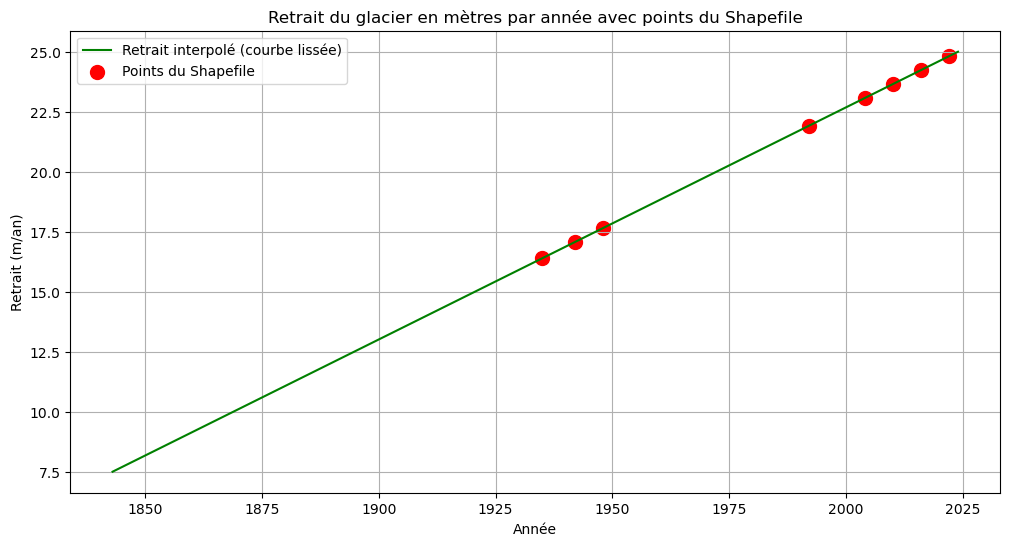

In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

# 1. Charger le Shapefile original contenant les points
gdf = gpd.read_file(r"D:\UQTR\Automne 2024\Ouest\points_all.shp")

# 2. Vérifier le système de coordonnées
print("Système de coordonnées initial :", gdf.crs)

# 3. Reprojeter si nécessaire pour travailler dans un système métrique (par exemple UTM zone 33N)
gdf = gdf.to_crs(epsg=32633)
print("Système de coordonnées après reprojection :", gdf.crs)

# 4. Convertir la colonne 'year' en type numérique
gdf['year'] = pd.to_numeric(gdf['year'], errors='coerce')

# 5. Supprimer les lignes avec des valeurs manquantes ou années hors plage
gdf = gdf.dropna(subset=['year'])
gdf = gdf[(gdf['year'] >= 1843) & (gdf['year'] <= 2024)]

# 6. Trier par année
gdf = gdf.sort_values(by='year').reset_index(drop=True)

# 7. Extraire les années et géométries existantes (from shapefile)
years_existing = gdf['year'].values
# Note: We won't use x_existing and y_existing as they are UTM coordinates
# Instead, we will plot the retreat values for the same years as the shapefile points.

# --- Your Retreat Data ---
# Example data for the green line representing glacier retreat in meters per year
years_full = np.arange(1843, 2025)
retreat = np.linspace(7.5, 25.0, len(years_full))  # Example values for retreat

# --- Visualisation ---

plt.figure(figsize=(12, 6))

# 8. Tracer la courbe verte interpolée
plt.plot(years_full, retreat, color='green', label='Retrait interpolé (courbe lissée)')

# 9. Ajouter les points rouges correspondant aux années du Shapefile
# Here we need to match the retreat values for the years found in the shapefile
matching_retreat_values = np.interp(years_existing, years_full, retreat)
plt.scatter(years_existing, matching_retreat_values, color='red', s=100, label='Points du Shapefile')

# 10. Ajouter des titres et étiquettes
plt.title('Retrait du glacier en mètres par année avec points du Shapefile')
plt.xlabel('Année')
plt.ylabel('Retrait (m/an)')

# 11. Ajouter une légende
plt.legend()

# 12. Afficher le graphique
plt.grid(True)
plt.show()


Retrait annuel moyen : 17.51 mètres/an
Médiane du retrait annuel : 16.72 mètres/an
Écart-type du retrait annuel : 6.31 mètres/an
Année 1935 : Retrait de 6.74 mètres/an
Année 1942 : Retrait de 15.20 mètres/an
Année 1948 : Retrait de 13.34 mètres/an
Année 1992 : Retrait de 13.75 mètres/an
Année 2002 : Retrait de 10.76 mètres/an
Année 2006 : Retrait de 16.64 mètres/an
Année 2009 : Retrait de 16.81 mètres/an
Année 2015 : Retrait de 20.51 mètres/an
Année 2017 : Retrait de 31.77 mètres/an
Année 2020 : Retrait de 18.36 mètres/an
Année 2022 : Retrait de 21.88 mètres/an
Année 2024 : Retrait de 24.35 mètres/an


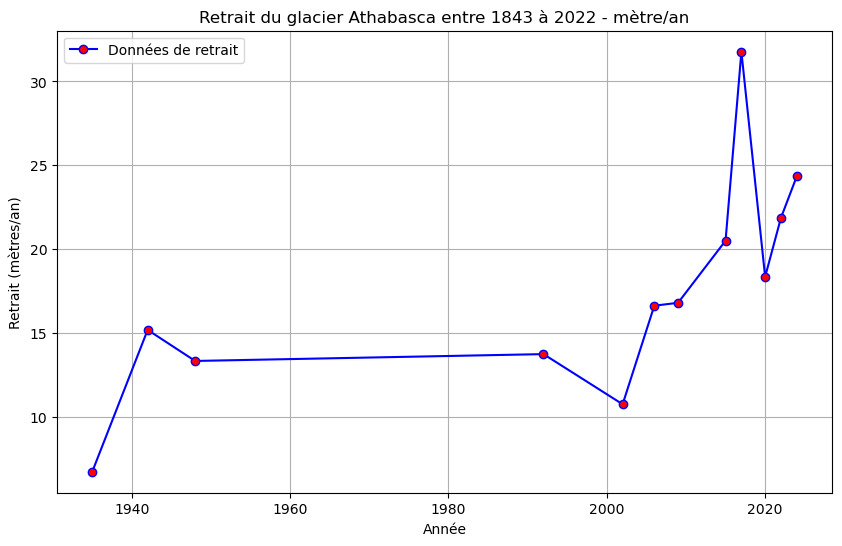

In [19]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger le Shapefile original contenant les points
gdf = gpd.read_file(r"D:\UQTR\Automne 2024\Ouest\retrait_glacier\point_gps_retrait.shp")

# Reprojeter si nécessaire pour travailler dans un système métrique (UTM zone 33N)
gdf = gdf.to_crs(epsg=26911)

# Convertir la colonne 'year' en type numérique
gdf['year'] = pd.to_numeric(gdf['year'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes ou années hors plage
gdf = gdf.dropna(subset=['year'])
gdf = gdf[(gdf['year'] >= 1843) & (gdf['year'] <= 2024)]

# Trier par année
gdf = gdf.sort_values(by='year').reset_index(drop=True)

# Extraire les années et géométries existantes
years_existing = gdf['year'].values
points_existing = gdf.geometry.values

# Extraire les coordonnées des points existants
x_existing = np.array([point.x for point in points_existing])
y_existing = np.array([point.y for point in points_existing])

# Calculer les distances cumulées en mètres entre les points
distances = np.sqrt(np.diff(x_existing)**2 + np.diff(y_existing)**2)
cumulative_distances = np.cumsum(distances)

# Calculer les retraits annuels (en mètres par an)
years_diff = np.diff(years_existing)
retreat_per_year = np.divide(distances, years_diff)
# Calculer les statistiques de base pour les retraits annuels
mean_retreat = np.mean(retreat_per_year)
median_retreat = np.median(retreat_per_year)
std_dev_retreat = np.std(retreat_per_year)

# Afficher les statistiques
print(f"Retrait annuel moyen : {mean_retreat:.2f} mètres/an")
print(f"Médiane du retrait annuel : {median_retreat:.2f} mètres/an")
print(f"Écart-type du retrait annuel : {std_dev_retreat:.2f} mètres/an")

# Afficher les statistiques de retrait par année
for year, retreat in zip(years_existing[1:], retreat_per_year):
    print(f"Année {year} : Retrait de {retreat:.2f} mètres/an")
# Créer un graphique du retrait par mètre/an
plt.figure(figsize=(10, 6))
plt.plot(years_existing[1:], retreat_per_year, marker='o', linestyle='-', color='blue', markerfacecolor='red', label='Données de retrait')
plt.legend()
plt.title('Retrait du glacier Athabasca entre 1843 à 2022 - mètre/an')
plt.xlabel('Année')
plt.ylabel('Retrait (mètres/an)')
plt.grid(True)

# Afficher le graphique
plt.show()

